<a href="https://www.kaggle.com/code/youssef19/practical-guide-to-dimesnioality-reduction-in-pyth?scriptVersionId=106235805" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Practical Guide to Dimesnioality Reduction in Python

### Notebook content: 
1. Loading and explore the MNSIT dataset
2. Principal Component Analysis (PCA)
    
    2.1.Explained Variance Ratio
    
    2.2.PCA for Compression
    
    2.3. Randomized PCA
    
    2.4. Incremental PCA
3. Locally Linear Embedding   
4. t-Distributed Stochastic Neighbor Embedding
5. Linear Discriminant Analysis
6. Locally Linear Embedding
    

# 1. Loading and explore the MNSIT dataset


In [1]:
# load all the packages and the libraries that will be used
from sklearn.decomposition import PCA
from keras.datasets import mnist
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np
import time

11501568/11490434 [==============================] - 0s 0us/step


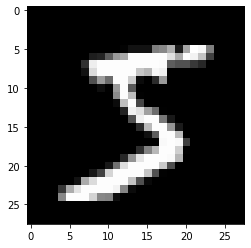

In [2]:
# Loading and Plotting random image of the mnsit dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

# plotting the first image of the MNSIt dataset
pyplot.imshow(train_X[0], cmap=pyplot.get_cmap('gray'))
pyplot.show()

In [3]:
print('The shape of the data',train_X.shape)

The shape of the data (60000, 28, 28)


In [4]:
train_X_reshaped = train_X.reshape(60000, 28*28)
print('The shape of the reshaped data', train_X_reshaped.shape)

The shape of the reshaped data (60000, 784)


# 2. Principal Component Analysis (PCA)

In [5]:
# Apply PCA to MNSIT dataset

# get the start time
st = time.time()

pca = PCA(n_components = 100)
X_100D = pca.fit_transform(train_X_reshaped)

# get the end time
et = time.time()

# get the execution time
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')
print('The shape of the reduced data',X_100D.shape)

Execution time: 6.390979290008545 seconds
The shape of the reduced data (60000, 100)


## 2.1.Explained Variance Ratio

In [6]:
# Calcualte the explain varinace ration for each dimesnion
pca.explained_variance_ratio_

array([0.09704664, 0.07095924, 0.06169089, 0.05389419, 0.04868797,
       0.04312231, 0.0327193 , 0.02883895, 0.02762029, 0.02357001,
       0.0210919 , 0.02022991, 0.01715818, 0.01692111, 0.01578641,
       0.01482953, 0.01324561, 0.01276897, 0.01187263, 0.01152684,
       0.01066166, 0.01006713, 0.00953573, 0.00912544, 0.00883405,
       0.00839319, 0.00812579, 0.00786366, 0.00744733, 0.00690859,
       0.00658094, 0.00648148, 0.00602615, 0.00586582, 0.00570021,
       0.00543628, 0.00505786, 0.00487859, 0.00481429, 0.00472266,
       0.00456747, 0.00444836, 0.00418501, 0.00398215, 0.00384974,
       0.00375103, 0.00362009, 0.00351591, 0.00340057, 0.00321873,
       0.00319015, 0.00312804, 0.00295981, 0.00288953, 0.00284127,
       0.00271432, 0.00269518, 0.00258466, 0.00253766, 0.00244776,
       0.002405  , 0.00239246, 0.00230403, 0.00221512, 0.00213691,
       0.00207202, 0.00203009, 0.00196755, 0.0019275 , 0.00188541,
       0.00186936, 0.00181025, 0.00177477, 0.00174832, 0.00165

In [7]:
# Choosing the Right Number of Dimensions
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.90) + 1 
print ('The number of required components to get explained variance of 90 % is',d)

The number of required components to get explained variance of 90 % is 87


In [8]:
# Defining the varinace explained ratio
pca = PCA(n_components=0.90)
X_reduced = pca.fit_transform(train_X_reshaped)
print('The shape of the dimesnialy reduced data is',X_reduced.shape)

The shape of the dimesnialy reduced data is (60000, 87)


Text(0, 0.5, 'Explained Varinace')

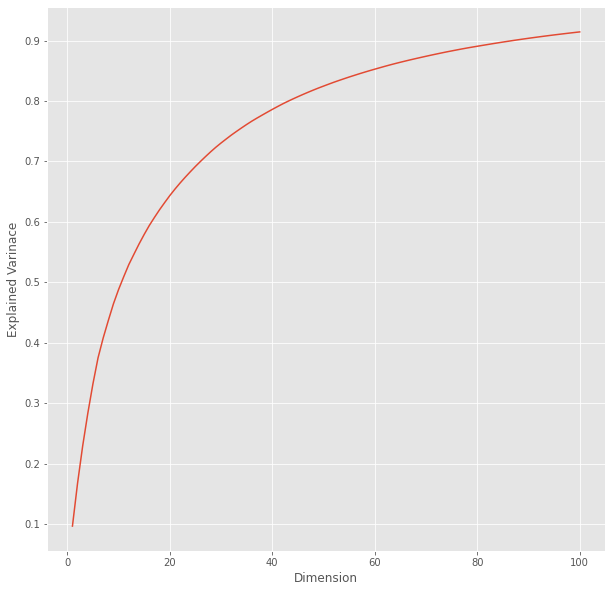

In [9]:
#  Plotting the explained variance as a function of the number of dimensions
plt.style.use('ggplot')
plt.figure(figsize=(10,10))

pyplot.plot(np.arange(1,len(cumsum)+1), cumsum)
pyplot.xlabel('Dimension')
pyplot.ylabel('Explained Varinace')


## 2.2.PCA for Compression

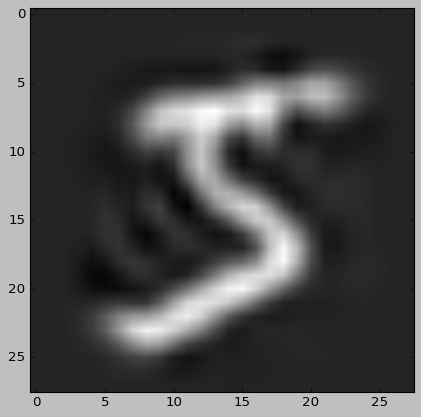

In [10]:
# decompressing the dimensioality reduced images 
X_recovered = pca.inverse_transform(X_reduced)
X_recovered = X_recovered.reshape(60000,28,28)

# Plotting the decompressed image
plt.style.use('classic')
pyplot.imshow(X_recovered[0], cmap=pyplot.get_cmap('gray'))
pyplot.show()


## 2.3.Randomized PCA

In [11]:
# Calculate the execution time for the PCA using full SVD solver

# get the start time
st = time.time()

rnd_pca = PCA(n_components=100, svd_solver="full")
X_reduced_rand = rnd_pca.fit_transform(train_X_reshaped)

# get the end time
et = time.time()

# get the execution time
elapsed_time = et - st
print('Execution time using full SVD', elapsed_time, 'seconds')

# Calculate the execution time for the PCA using randomized solver

# get the start time
st = time.time()

rnd_pca = PCA(n_components=100, svd_solver="randomized")
X_reduced_rand = rnd_pca.fit_transform(train_X_reshaped)

# get the end time
et = time.time()

# get the execution time
elapsed_time = et - st
print('Execution time using randomized solver', elapsed_time, 'seconds')


Execution time using full SVD 9.218934774398804 seconds
Execution time using randomized solver 6.077014684677124 seconds


## 2.4.Incremental PCA

In [12]:
# get the start time
st = time.time()    

from sklearn.decomposition import IncrementalPCA
n_batches = 100 # number of batches 
inc_pca = IncrementalPCA(n_components=100) # Define the Incremental PCA
for X_batch in np.array_split(train_X_reshaped, n_batches): # Apply PCA on each batch 
    inc_pca.partial_fit(X_batch)
    
X_reduced = inc_pca.transform(train_X_reshaped)

# get the end time
et = time.time()
# get the execution time
elapsed_time = et - st
print('Execution time using Incremental PCA', elapsed_time, 'seconds')

Execution time using Incremental PCA 34.85727667808533 seconds


## 2.5.Kernel PCA

The shape of the swiss rol1 data  (10000, 3) (10000,)


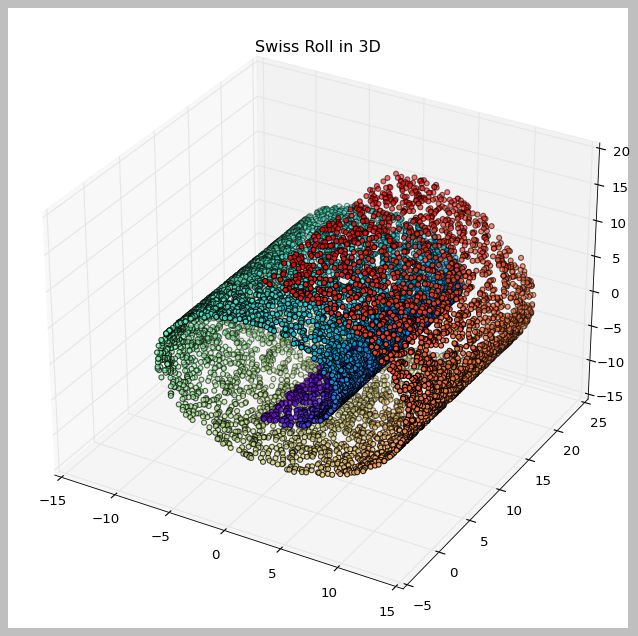

In [13]:
# create and plot swiss roll 
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_swiss_roll

# generate 3D swiss roll data
X, y = datasets.make_swiss_roll(n_samples=10000, noise=0.0, random_state=None)
print('The shape of the swiss rol1 data ',X.shape, y.shape)

# plot the swiss roll data 
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.rainbow)
plt.title('Swiss Roll in 3D')
plt.show()

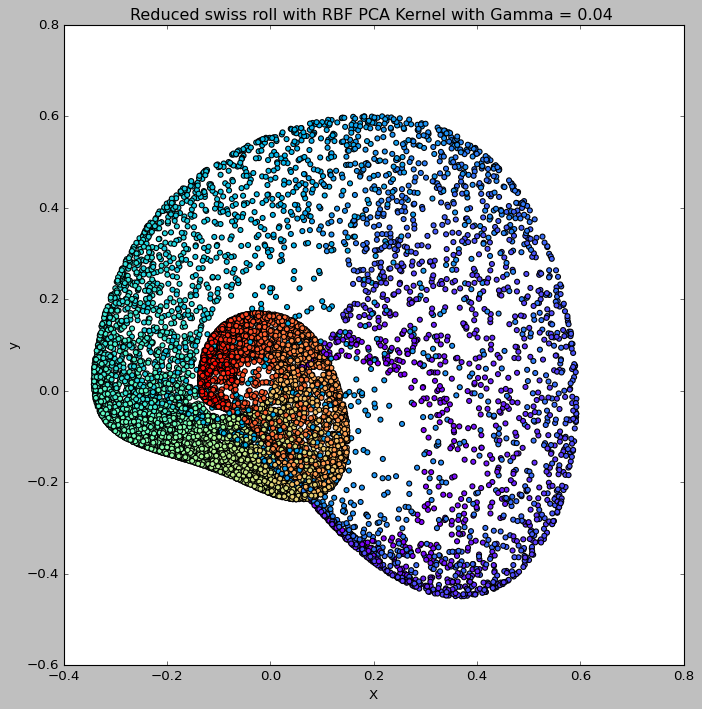

In [14]:
from sklearn.decomposition import KernelPCA
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.04)
X_reduced_rbf = rbf_pca.fit_transform(X)
X_reduced_rbf.shape
plt.figure(figsize=(10,10))
plt.scatter(X_reduced_rbf[:, 0],X_reduced_rbf[:,1], c=y, cmap=plt.cm.rainbow )
plt.xlabel("X") 
plt.ylabel("y")
plt.title("Reduced swiss roll with RBF PCA Kernel with Gamma = 0.04 ")
plt.show()

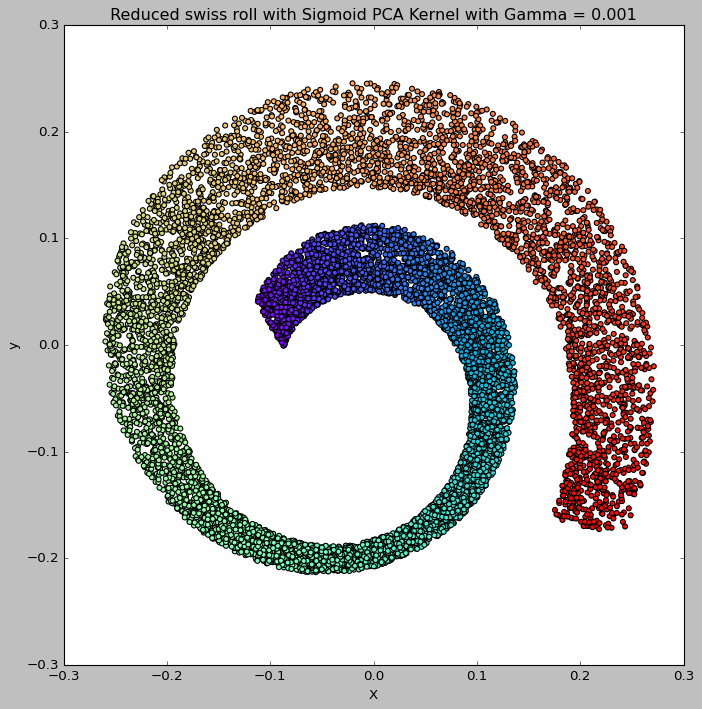

In [15]:
rbf_pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.001)
X_reduced_rbf = rbf_pca.fit_transform(X)
X_reduced_rbf.shape

plt.figure(figsize=(10,10))
plt.scatter(X_reduced_rbf[:, 0],X_reduced_rbf[:,1], c=y, cmap=plt.cm.rainbow )
plt.xlabel("X") 
plt.ylabel("y")
plt.title(" Reduced swiss roll with Sigmoid PCA Kernel with Gamma = 0.001 ")
plt.show()

#### Lets compare the results of PCA 

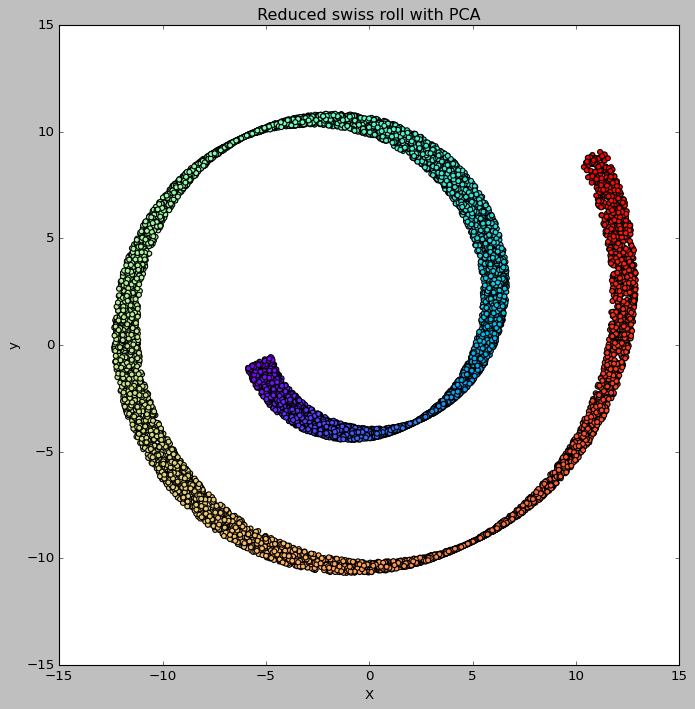

In [16]:
pca = PCA(n_components = 2)
X_reduced_pca = pca.fit_transform(X)

plt.figure(figsize=(10,10))
plt.scatter(X_reduced_pca[:, 0],X_reduced_pca[:,1], c=y, cmap=plt.cm.rainbow )
plt.xlabel("X") 
plt.ylabel("y")
plt.title(" Reduced swiss roll with PCA ")
plt.show()

# 3. Locally Linear Embedding

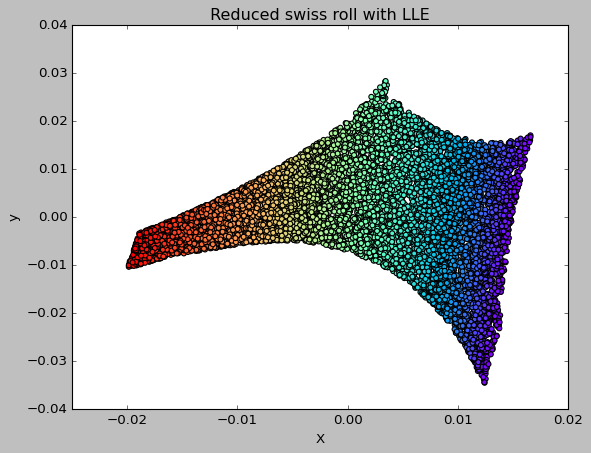

In [17]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_reduced_LLE = lle.fit_transform(X)

plt.scatter(X_reduced_LLE[:, 0],X_reduced_LLE[:,1], c=y, cmap=plt.cm.rainbow )
plt.xlabel("X") 
plt.ylabel("y")
plt.title(" Reduced swiss roll with LLE ")
plt.show()

# 4. t-Distributed Stochastic Neighbor Embedding (t-DSNE)

In [18]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import matplotlib.patheffects as PathEffects
%matplotlib inline

In [19]:
time_start = time.time()

tsne = TSNE()
tsne_results = tsne.fit_transform(train_X_reshaped)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))


/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


t-SNE done! Time elapsed: 713.7504184246063 seconds


In [20]:
def plot_scatter(x, colors, title):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))
    print(palette)
    
    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1],  c=palette[colors.astype(np.int)], cmap=plt.cm.get_cmap('Paired'))
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    #ax.axis('off')
    ax.axis('tight')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_title(title)
    # add the labels for each digit corresponding to the label
    txts = []
    
    for i in range(num_classes):
        # Position of each label at median of data points.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([PathEffects.Stroke(linewidth=5, foreground="w"),
                              PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts


[[0.86   0.3712 0.34  ]
 [0.86   0.6832 0.34  ]
 [0.7248 0.86   0.34  ]
 [0.4128 0.86   0.34  ]
 [0.34   0.86   0.5792]
 [0.34   0.8288 0.86  ]
 [0.34   0.5168 0.86  ]
 [0.4752 0.34   0.86  ]
 [0.7872 0.34   0.86  ]
 [0.86   0.34   0.6208]]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # Remove the CWD from sys.path while we load stuff.


(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:title={'center':'2D t-DSNE reduced MNSIT data'}, xlabel='X1', ylabel='X2'>,
 [Text(27.295242, -23.950588, '0'),
  Text(-30.804745, -31.82215, '1'),
  Text(2.3966851, -30.705963, '2'),
  Text(13.273741, 6.821001, '3'),
  Text(-15.540169, 18.842579, '4'),
  Text(24.436808, 29.626572, '5'),
  Text(44.993217, 6.2244577, '6'),
  Text(-31.612677, -7.334847, '7'),
  Text(-2.5117438, 35.537075, '8'),
  Text(-23.884504, 8.758121, '9')])

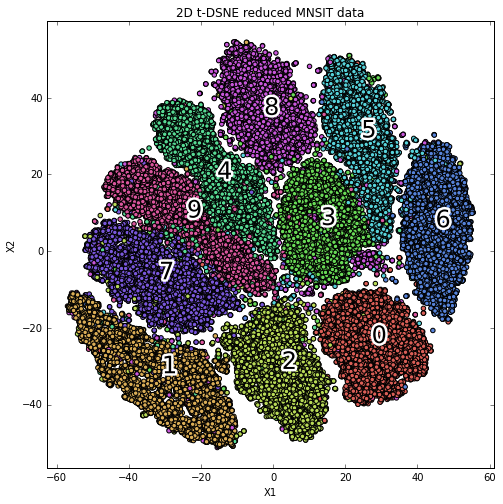

In [21]:
plot_scatter( tsne_results, train_y,'2D t-DSNE reduced MNSIT data')

# 5. Linear Discriminant Analysis

In [22]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Apply PCA to MNSIT dataset

# get the start time
st = time.time()

lda = LinearDiscriminantAnalysis(n_components=3)
train_lda = lda.fit_transform(train_X_reshaped, train_y)

# get the end time
et = time.time()

# get the execution time
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')
print('The shape of the reduced data',train_lda.shape)


Execution time: 14.316735982894897 seconds
The shape of the reduced data (60000, 3)


In [23]:
print("The explained variance ratio: ", lda.explained_variance_ratio_.sum())

The explained variance ratio:  0.6195354949768477


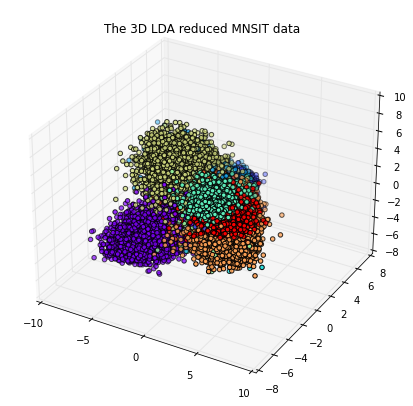

In [24]:
# plot the 3D LDA reduced data 
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(train_lda[:, 0], train_lda[:, 1], train_lda[:, 2], c=train_y, cmap=plt.cm.rainbow)
plt.title('The 3D LDA reduced MNSIT data')
plt.show()

In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Apply PCA to MNSIT dataset

# get the start time
st = time.time()

lda = LinearDiscriminantAnalysis(n_components=2)
train_lda_2D = lda.fit_transform(train_X_reshaped, train_y)

# get the end time
et = time.time()

# get the execution time
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')
print('The shape of the reduced data',train_lda_2D.shape)
print("The explained variance ratio: ", lda.explained_variance_ratio_.sum())

Execution time: 13.503582000732422 seconds
The shape of the reduced data (60000, 2)
The explained variance ratio:  0.4410385449022901


[[0.86   0.3712 0.34  ]
 [0.86   0.6832 0.34  ]
 [0.7248 0.86   0.34  ]
 [0.4128 0.86   0.34  ]
 [0.34   0.86   0.5792]
 [0.34   0.8288 0.86  ]
 [0.34   0.5168 0.86  ]
 [0.4752 0.34   0.86  ]
 [0.7872 0.34   0.86  ]
 [0.86   0.34   0.6208]]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # Remove the CWD from sys.path while we load stuff.


(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:title={'center':'2D MNSIT reduced data using LDA'}, xlabel='X1', ylabel='X2'>,
 [Text(-3.183064563477759, -2.7213529800802965, '0'),
  Text(0.5271724833010555, 4.068215071623337, '1'),
  Text(-1.1164667929482333, 1.1007129180877884, '2'),
  Text(-0.47564060377295875, 0.8619233865367598, '3'),
  Text(1.8044419745968532, -1.1261404567376039, '4'),
  Text(-0.9197192171274768, -0.4271229807231716, '5'),
  Text(-2.3350869935231566, -0.5334684857007346, '6'),
  Text(3.3335376086996797, -1.7515801202323986, '7'),
  Text(-0.5285211262602016, 0.7388264515533167, '8'),
  Text(2.674671936278032, -1.2577550096672518, '9')])

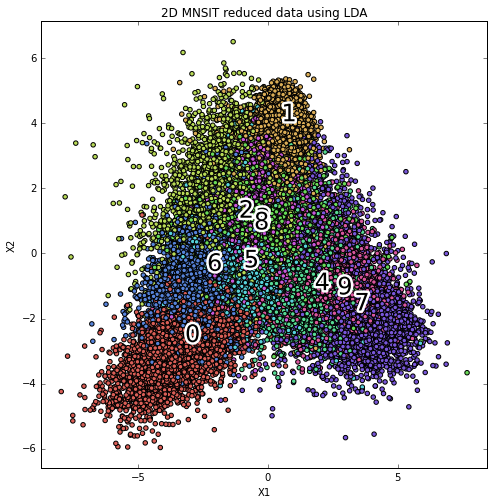

In [26]:
plot_scatter( train_lda_2D, train_y,'2D MNSIT reduced data using LDA')

# 6. Multidimensional Scaling

In [27]:
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import manhattan_distances, euclidean_distances
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [28]:
X = np.array([[0, 0, 0], [0, 0, 1], [1, 1, 1], [0, 1, 0], [0, 1, 1]])
mds = MDS(random_state=0)
X_transform = mds.fit_transform(X)
print(X_transform)

[[ 0.72521687  0.52943352]
 [ 0.61640884 -0.48411805]
 [-0.9113603  -0.47905115]
 [-0.2190564   0.71505714]
 [-0.21120901 -0.28132146]]


In [29]:
print('The stree factor is',mds.stress_)

The stree factor is 0.18216844548575456


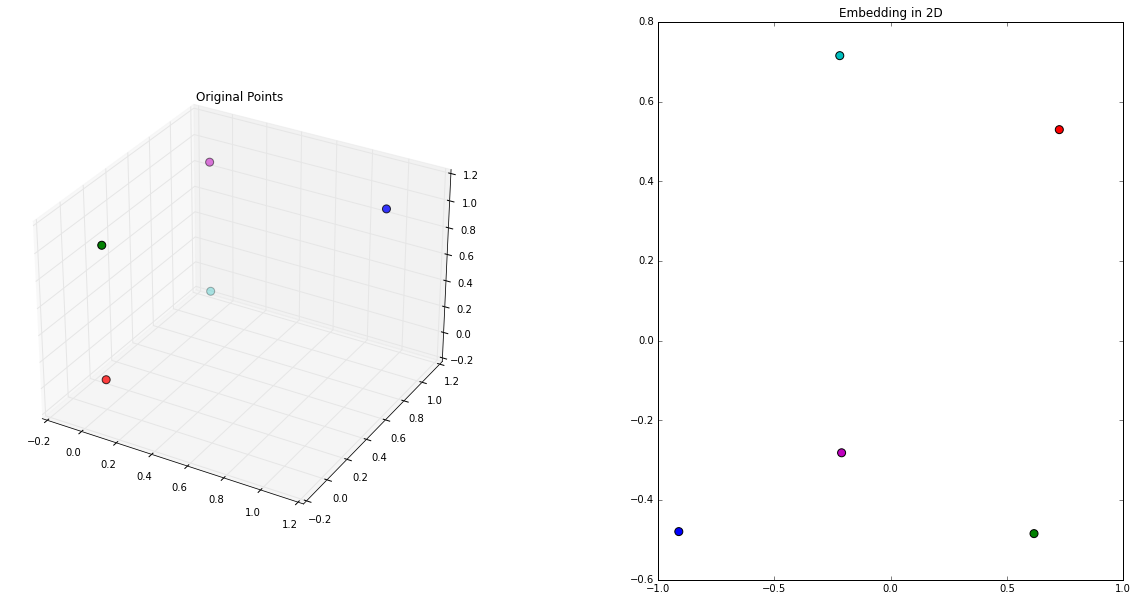

In [30]:
colors = ['r', 'g', 'b', 'c', 'm']
size = [64, 64, 64, 64, 64]

fig = plt.figure(2, (20,10))
ax = fig.add_subplot(121, projection='3d')
plt.scatter(X[:,0], X[:,1], zs=X[:,2], s=size, c=colors)
plt.title('Original Points')

ax = fig.add_subplot(122)
plt.scatter(X_transform[:,0], X_transform[:,1], s=size, c=colors)
plt.title('Embedding in 2D')
fig.subplots_adjust(wspace=.4, hspace=0.5)
plt.show()


In [31]:
def mapData(dist_matrix, X, y, metric, title):
    mds = MDS(metric=metric, dissimilarity='precomputed', random_state=0)
    # Get the embeddings
    pts = mds.fit_transform(dist_matrix)
    print('The stress factor is',mds.stress_)
    # Plot the embedding, colored according to the class of the points
    fig = plt.figure(2, (15,6))
    ax = fig.add_subplot(1,2,1)    
    ax = sns.scatterplot(x=pts[:, 0], y=pts[:, 1],
                         hue=y, palette='colorblind' )
    plt.title('Embedding in 2D')
  
    # Add the second plot
    ax = fig.add_subplot(1,2,2)
    # Plot the points again
    plt.scatter(pts[:, 0], pts[:, 1])
    
    # Annotate each point by its corresponding face image
    for x, ind in zip(X, range(pts.shape[0])):
        im = x.reshape(28,28)
        imagebox = OffsetImage(im, zoom=0.5, cmap=plt.cm.gray)
        i = pts[ind, 0]
        j = pts[ind, 1]
        ab = AnnotationBbox(imagebox, (i, j), frameon=False)
        ax.add_artist(ab)
    plt.title(title)    
    plt.show()

The stress factor is 2120089466.8069305


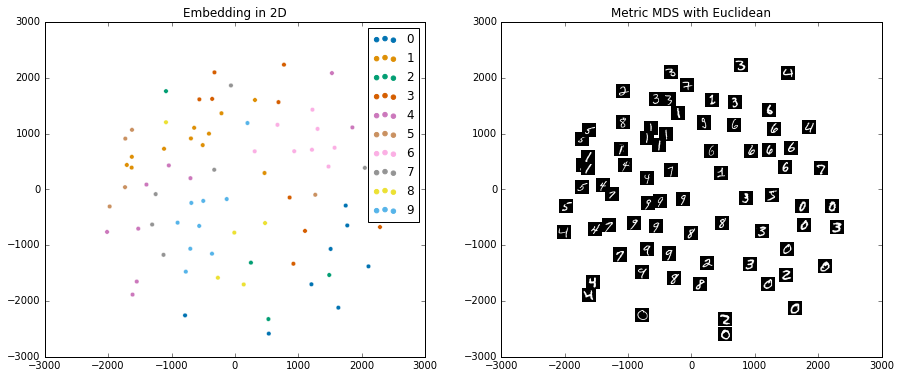

In [32]:
dist_euclid = euclidean_distances(train_X_reshaped[0:75])
mapData(dist_euclid, train_X_reshaped[0:75], train_y[0:75], True, 
        'Metric MDS with Euclidean')

The stress factor is 270655860987.8894


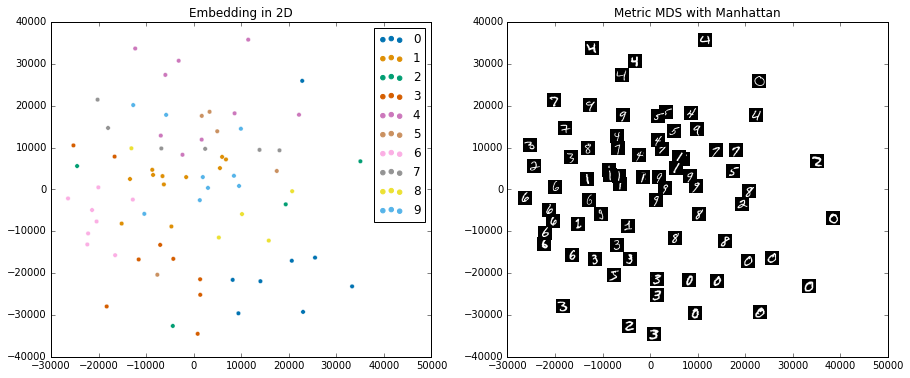

In [33]:
dist_L1 = manhattan_distances(train_X_reshaped[0:75])
mapData(dist_L1, train_X_reshaped[0:75], train_y[0:75], True, 
        'Metric MDS with Manhattan')

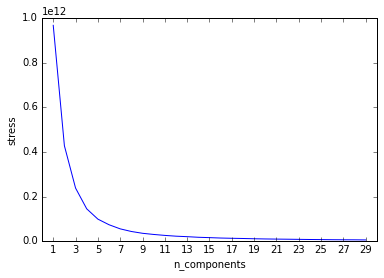

In [34]:
dist_euclid = euclidean_distances(train_X_reshaped[0:1000])

stress = []
# Max value for n_components
max_range = 30
for dim in range(1, max_range):
    # Set up the MDS object
    mds = MDS(n_components=dim, dissimilarity='precomputed', random_state=0)
    # Apply MDS
    pts = mds.fit_transform(dist_euclid)
    # Retrieve the stress value
    stress.append(mds.stress_)
# Plot stress vs. n_components    
plt.plot(range(1, max_range), stress)
plt.xticks(range(1, max_range, 2))
plt.xlabel('n_components')
plt.ylabel('stress')
plt.show()